## Treatment of Runge effect in bivariate interpolation:


In [1]:
import numpy as np
import numpy.matlib as mlb


import matplotlib.pyplot as plb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from interp2d import wamfit, pdpts, equisp_unisolv

In [3]:
f = lambda x,y: 1./(1+5*(x**2+y**2))

In [4]:
def S(x,y):
    xyrange = np.array([-1,1,-1,1])
    # riporto a [0,1]
    xn = (x+1)/2
    yn = (y+1)/2
    X = (xyrange[0]+xyrange[1]+(xyrange[1]-xyrange[0])*
                        -1*np.cos(xn*np.pi))/2
    Y = (xyrange[2]+xyrange[3]+(xyrange[3]-xyrange[2])*
                        -1*np.cos(yn*np.pi))/2
    return X.reshape(-1), Y.reshape(-1)

In [5]:
N=10

pdx, pdy = pdpts(N)
x, y  = equisp_unisolv(N)
x_f, y_f = S(x,y)

n_eval = N+10
X, Y = np.meshgrid(np.linspace(-1,1,n_eval),np.linspace(-1,1, n_eval))
X, Y = X.flatten(), Y.flatten()
f_true = f(X,Y).reshape(-1,1)

X_f, Y_f = S(X,Y)

f_eq = wamfit(N, np.array([x, y]).T, np.array([X,Y]).T, f(x,y).reshape(-1,1))[1]
err_eq = np.linalg.norm(f_eq.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval

f_fake = wamfit(N, np.array([x_f, y_f]).T, np.array([X_f,Y_f]).T, f(x,y).reshape(-1,1))[1]
err_fake = np.linalg.norm(f_fake.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval

f_PD = wamfit(N, np.array([pdx, pdy]).T, np.array([X,Y]).T, f(pdx,pdy).reshape(-1,1))[1]
err_PD = np.linalg.norm(f_PD.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval

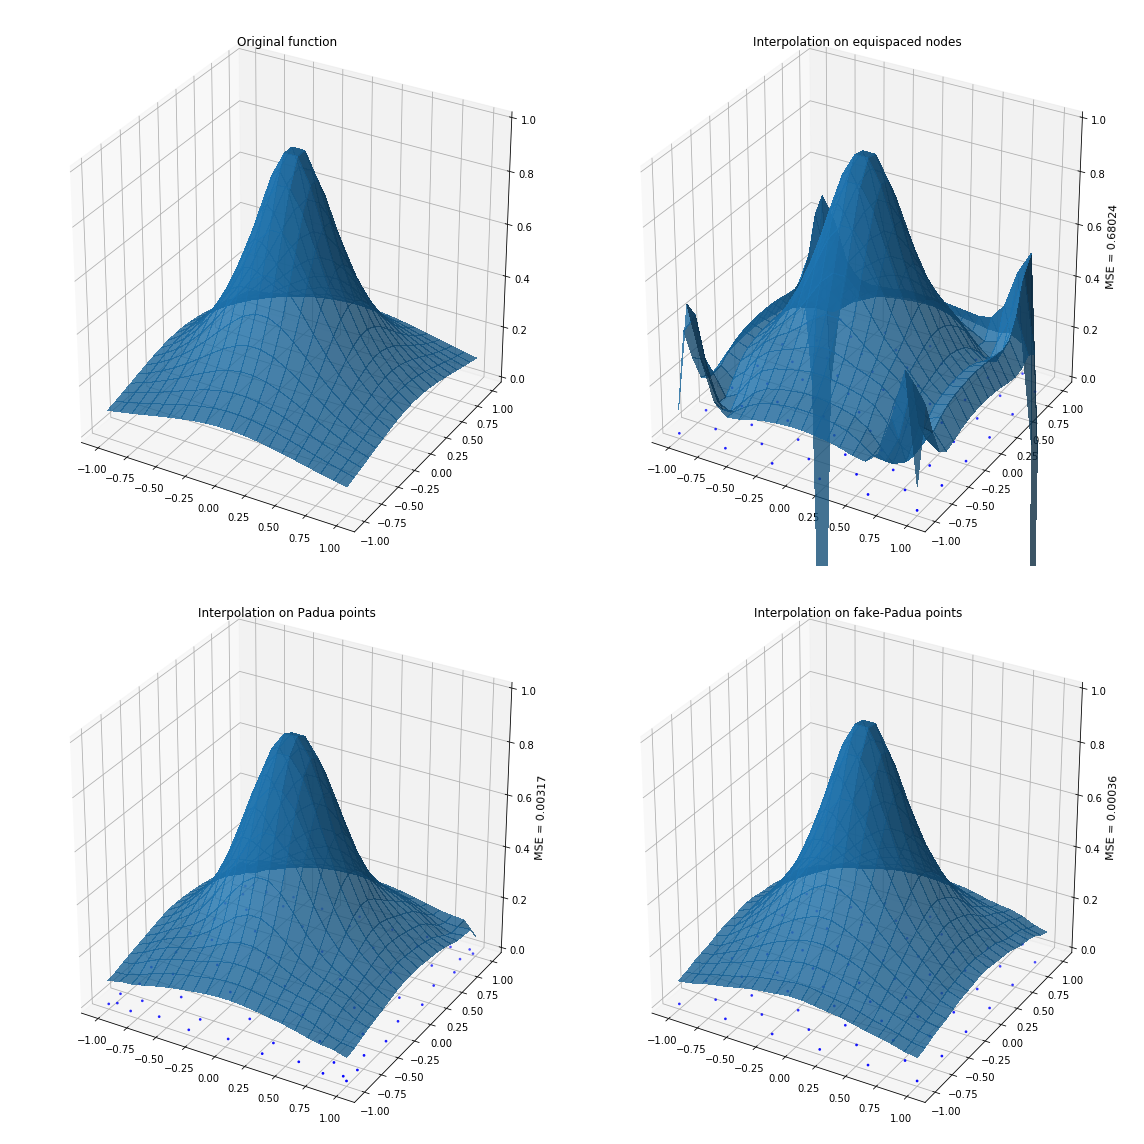

In [6]:
alpha = .8; s = 50

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_true.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax1.set_title("Original function")
ax1.set_zlim([0,1])

##
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_eq.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax2.scatter(x, y, 0, c='b',s=s//4, marker = '.')
ax2.set_title("Interpolation on equispaced nodes")
ax2.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_eq.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax2.set_zlim([0,1])

##
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_PD.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax3.scatter(pdx, pdy, 0, c='b',s=s//4, marker = '.')
ax3.set_title("Interpolation on Padua points")
ax3.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_PD.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax3.set_zlim([0,1])

##
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_fake.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax4.scatter(x, y, 0, c='b',s=s//4, marker = '.')
ax4.set_title("Interpolation on fake-Padua points")
ax4.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_fake.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax4.set_zlim([0,1])
plt.tight_layout()
plt.savefig("Runge2D.png")

In [7]:
def errors(N):
    pdx, pdy = pdpts(N)
    x, y  = equisp_unisolv(N)
    x_f, y_f = S(x,y)
    
    n_eval = N+10
    X, Y = np.meshgrid(np.linspace(-1,1,n_eval),np.linspace(-1,1, n_eval))
    X, Y = X.flatten(), Y.flatten()
    f_true = f(X,Y).reshape(-1,1)
    
    X_f, Y_f = S(X,Y)
    
    f_eq = wamfit(N, np.array([x, y]).T, np.array([X,Y]).T, f(x,y).reshape(-1,1))[1]
    err_eq = np.linalg.norm(f_eq.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval

    f_fake = wamfit(N, np.array([x_f, y_f]).T, np.array([X_f,Y_f]).T, f(x,y).reshape(-1,1))[1]
    err_fake = np.linalg.norm(f_fake.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval

    f_PD = wamfit(N, np.array([pdx, pdy]).T, np.array([X,Y]).T, f(pdx,pdy).reshape(-1,1))[1]
    err_PD = np.linalg.norm(f_PD.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval
    
    return err_eq, err_PD, err_fake

In [8]:
Nrange = list(range(5,31))
Eq, PD, Fake = [], [], []

for n in Nrange:
    if n%5==0: print(n)
    eq, pd, fake = errors(n)
    Eq.append(eq)
    PD.append(pd)
    Fake.append(fake)

5
10
15
20
25
30


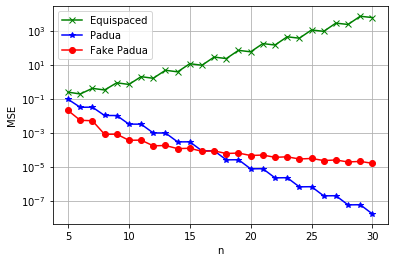

In [9]:
plt.semilogy(Nrange, Eq, '-xg')
plt.semilogy(Nrange, PD, '-*b')
plt.semilogy(Nrange, Fake, '-or')
plt.xlabel("n")
plt.ylabel("MSE")
plt.legend(['Equispaced','Padua','Fake Padua'])
plt.grid()

plt.savefig("Runge2D_convergence.png")